In [73]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [139]:
train_labels[0]

1

In [297]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [46]:
max([max(sequence) for sequence in train_data])  #because we kept only 10,000 most occuring words

9999

In [47]:
word_index = imdb.get_word_index()

In [289]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [290]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [50]:
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [192]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [193]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [194]:
y_train[0]

1.0

In [195]:
from keras import models
from keras import layers

In [196]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [197]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [198]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 362us/step - loss: 0.4069 - acc: 0.8416 - val_loss: 0.3046 - val_acc: 0.8801
Epoch 2/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.2128 - acc: 0.9209 - val_loss: 0.4090 - val_acc: 0.8407
Epoch 3/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1583 - acc: 0.9425 - val_loss: 0.2917 - val_acc: 0.8874
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1215 - acc: 0.9578 - val_loss: 0.3324 - val_acc: 0.8802
Epoch 5/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.0941 - acc: 0.9675 - val_loss: 0.3660 - val_acc: 0.8791
Epoch 6/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.0728 - acc: 0.9750 - val_loss: 0.4155 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.0564 - acc: 0.9807 - val_loss: 0.4696 - 

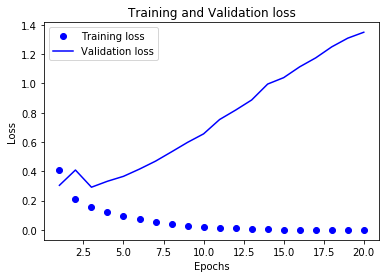

In [199]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

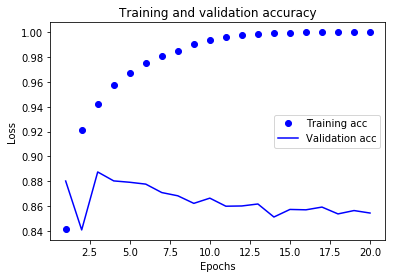

In [200]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [201]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) #since accuracy is highest at epoch no 4 so only running till four epochb

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.4315 - acc: 0.8256
Epoch 2/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.2483 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.1963 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


[0.29767515930652616, 0.88404]

In [202]:
model.predict(x_test)

array([[0.16327323],
       [0.9998914 ],
       [0.88903964],
       ...,
       [0.09766853],
       [0.05033728],
       [0.54584336]], dtype=float32)

# using 1 hidden Layer

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 302us/step - loss: 0.3934 - acc: 0.8502 - val_loss: 0.2923 - val_acc: 0.8908
Epoch 2/4
15000/15000 [==============================] - 3s 233us/step - loss: 0.2231 - acc: 0.9213 - val_loss: 0.2722 - val_acc: 0.8906
Epoch 3/4
15000/15000 [==============================] - 4s 239us/step - loss: 0.1682 - acc: 0.9397 - val_loss: 0.2817 - val_acc: 0.8891
Epoch 4/4
15000/15000 [==============================] - 3s 202us/step - loss: 0.1370 - acc: 0.9520 - val_loss: 0.3206 - val_acc: 0.8801


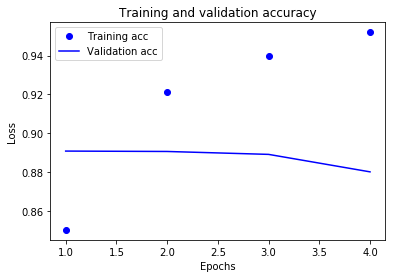

25000/25000 [==============================] - 3s 120us/step


[0.340672749247551, 0.86672]

In [226]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs= 4,
                    batch_size=128,
                    validation_data=(x_val, y_val))


plt.clf()
history_dict = history.history
epochs = range(1, len(history_dict['acc'])+1)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
results = model.evaluate(x_test, y_test)
results

As we can see the accuracy have decreased a little

# Using 3 hidden Layer

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 290us/step - loss: 0.4067 - acc: 0.8358 - val_loss: 0.2899 - val_acc: 0.8836
Epoch 2/4
15000/15000 [==============================] - 3s 185us/step - loss: 0.2121 - acc: 0.9211 - val_loss: 0.2792 - val_acc: 0.8893
Epoch 3/4
15000/15000 [==============================] - 3s 219us/step - loss: 0.1528 - acc: 0.9443 - val_loss: 0.3472 - val_acc: 0.8752
Epoch 4/4
15000/15000 [==============================] - 3s 223us/step - loss: 0.1170 - acc: 0.9573 - val_loss: 0.4140 - val_acc: 0.8614


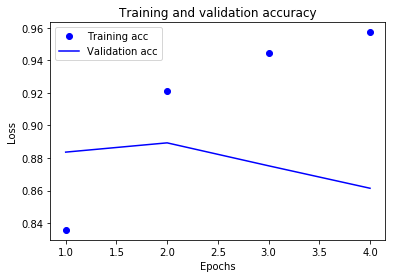

25000/25000 [==============================] - 3s 133us/step


[0.46557910677909853, 0.8448]

In [225]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs= 4,
                    batch_size=128,
                    validation_data=(x_val, y_val))



plt.clf()
history_dict = history.history
epochs = range(1, len(history_dict['acc'])+1)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
results = model.evaluate(x_test, y_test)
results

# Using our first arrangement but with more hidden units

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 341us/step - loss: 0.3710 - acc: 0.8409 - val_loss: 0.2834 - val_acc: 0.8865
Epoch 2/4
15000/15000 [==============================] - 4s 243us/step - loss: 0.1909 - acc: 0.9287 - val_loss: 0.2890 - val_acc: 0.8862
Epoch 3/4
15000/15000 [==============================] - 4s 240us/step - loss: 0.1267 - acc: 0.9527 - val_loss: 0.3947 - val_acc: 0.8637
Epoch 4/4
15000/15000 [==============================] - 4s 269us/step - loss: 0.0786 - acc: 0.9719 - val_loss: 0.3992 - val_acc: 0.8789


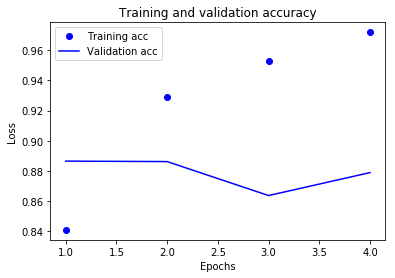

25000/25000 [==============================] - 4s 150us/step


[0.4377976579666138, 0.8646]

In [224]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs= 4,
                    batch_size=128,
                    validation_data=(x_val, y_val))

plt.clf()

history_dict = history.history
epochs = range(1, len(history_dict['acc'])+1)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']



plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
results

# Using tanh as activation function

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 246us/step - loss: 0.3763 - acc: 0.8479 - val_loss: 0.2747 - val_acc: 0.8875
Epoch 2/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.1937 - acc: 0.9265 - val_loss: 0.3017 - val_acc: 0.8802
Epoch 3/4
15000/15000 [==============================] - 3s 231us/step - loss: 0.1407 - acc: 0.9499 - val_loss: 0.3129 - val_acc: 0.8823
Epoch 4/4
15000/15000 [==============================] - 3s 175us/step - loss: 0.1072 - acc: 0.9646 - val_loss: 0.3752 - val_acc: 0.8706


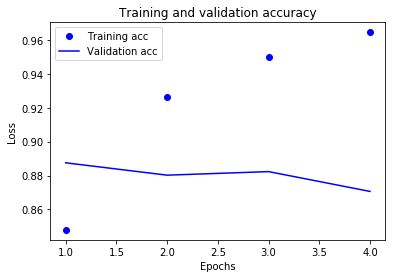

25000/25000 [==============================] - 3s 109us/step


[0.40778081449985504, 0.85856]

In [223]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs= 4,
                    batch_size=128,
                    validation_data=(x_val, y_val))



plt.clf()
history_dict = history.history
epochs = range(1, len(history_dict['acc'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
results = model.evaluate(x_test, y_test)
results

by using tanh as activation function our accuracy has gone done

# using 'mse' loss

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 267us/step - loss: 0.1247 - acc: 0.8443 - val_loss: 0.0919 - val_acc: 0.8796
Epoch 2/4
15000/15000 [==============================] - 3s 184us/step - loss: 0.0602 - acc: 0.9245 - val_loss: 0.0993 - val_acc: 0.8648
Epoch 3/4
15000/15000 [==============================] - 3s 186us/step - loss: 0.0429 - acc: 0.9479 - val_loss: 0.0860 - val_acc: 0.8847
Epoch 4/4
15000/15000 [==============================] - 3s 188us/step - loss: 0.0317 - acc: 0.9636 - val_loss: 0.0912 - val_acc: 0.8803


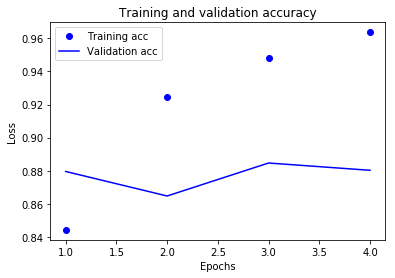

25000/25000 [==============================] - 3s 127us/step


[0.09905091178894043, 0.86748]

In [227]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs= 4,
                    batch_size=128,
                    validation_data=(x_val, y_val))



plt.clf()
history_dict = history.history
epochs = range(1, len(history_dict['acc'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
results = model.evaluate(x_test, y_test)
results

# Checking how network work for a random example

In [311]:
x = np.random.random((1, 10000))
x = x.round()
model.predict(x)

array([[3.1733052e-07, 1.0000000e+00]], dtype=float32)

# having fun with decoding random number list

In [334]:
y = []

for i in range(x.size):
    y.append(np.random.randint(low=0, high=9999))
y

[4117,
 8586,
 8374,
 3631,
 9468,
 4005,
 546,
 9189,
 2510,
 4782,
 5260,
 8280,
 3845,
 2553,
 2862,
 7074,
 6671,
 616,
 4733,
 4432,
 4937,
 7097,
 7481,
 8717,
 2627,
 8903,
 9886,
 2080,
 4614,
 3617,
 7180,
 307,
 1868,
 2502,
 7004,
 2652,
 6686,
 4475,
 6265,
 1175,
 4782,
 2644,
 6405,
 5711,
 1595,
 9221,
 7384,
 4770,
 2060,
 5155,
 7842,
 678,
 1344,
 4046,
 3330,
 3357,
 689,
 1322,
 1250,
 5880,
 6321,
 1794,
 356,
 7947,
 2327,
 8160,
 8275,
 3727,
 2605,
 4950,
 3230,
 7237,
 1184,
 2765,
 4213,
 5058,
 7715,
 5419,
 1039,
 6790,
 7327,
 9213,
 4743,
 3171,
 3346,
 1250,
 9346,
 9977,
 1418,
 4178,
 1359,
 3991,
 1033,
 6587,
 5390,
 6494,
 3728,
 5914,
 928,
 7302,
 6516,
 1700,
 5966,
 1077,
 504,
 2393,
 7478,
 6748,
 3529,
 43,
 9706,
 984,
 9693,
 8467,
 7134,
 6062,
 3094,
 2648,
 4889,
 2292,
 2167,
 4940,
 6175,
 809,
 4773,
 15,
 6553,
 4598,
 834,
 598,
 391,
 1103,
 8211,
 284,
 225,
 777,
 1941,
 5190,
 4520,
 4830,
 7879,
 6028,
 7423,
 5841,
 4640,
 5219

In [335]:
decoded_review = ' '.join(
[reverse_word_index.get(i, '?') for i in y])
decoded_review

"trees tricked 250 heston surpasses wealth except truthful security excessive phrase concentration glenn false picks scorsese paula sad accompanied preview gifted criticize boundaries lizard network jones' exposes grew bottle splendid stern version ball combined olivia afternoon miranda defend ronald recommended excessive bus macabre 1945 pull gage investigator 90s formula subjected surround word plan mildred 24 gothic attention producer adaptation raj colleagues passion need elsa destroy abomination billing shoes urban moronic dialogs c'mon project cell stinker palace kirsten fido doctor traits apt leaps agreed flash 2005 adaptation tourists aristocrat acts instant vampire newspaper cute rescued dose christie grandmother remove comment faux plotting build racing la they're fare turkish horny presumably out exposing create anchor ss centuries knightley happily angle leo k clean assigned error form descent for kidnapping adams dance complete terrible we're mediocrity shows music working